# Load image data

In [1]:
from keras.preprocessing.image import load_img, array_to_img, img_to_array, ImageDataGenerator
from keras.utils import to_categorical
from keras import applications as app
from keras import callbacks as cb
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import h5py

C:\Users\wogur\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Configuration

In [14]:
image_dir = '../dataset/train/'
train_h5py = '../dataset/h5py/train'
model_dir = '../model/'
c_list = os.listdir(image_dir)
class_num = 10
cv_rate = 0.4
cv_seed = 1223
batch_size = 32

# Load images

In [8]:
c_imgs = list()
c_labels = list()
hf = h5py.File(train_h5py,'r')
for i in range(len(c_list)):
    # load images
    c_npy = hf['train'+str(i)]
    c_imgs.append(c_npy)
    print('='*50)
    print('Complete to load {} images'.format(c_list[i]))
    print('shape: ',c_npy.shape)
    # label to categorical
    c_len = c_npy.shape[0]
    label = [i] * c_len
    c_label = to_categorical(label, class_num)
    c_labels.append(c_label)
    print('Complete to convert label to categorical')
    print('label: ',c_label[0])

Complete to load c0 images
shape:  (2489, 224, 224, 1)
Complete to convert label to categorical
label:  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Complete to load c1 images
shape:  (2267, 224, 224, 1)
Complete to convert label to categorical
label:  [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
Complete to load c2 images
shape:  (2317, 224, 224, 1)
Complete to convert label to categorical
label:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Complete to load c3 images
shape:  (2346, 224, 224, 1)
Complete to convert label to categorical
label:  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
Complete to load c4 images
shape:  (2326, 224, 224, 1)
Complete to convert label to categorical
label:  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
Complete to load c5 images
shape:  (2312, 224, 224, 1)
Complete to convert label to categorical
label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Complete to load c6 images
shape:  (2325, 224, 224, 1)
Complete to convert label to categorical
label:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Complete to load c7 images
shape:  (2002, 224, 2

# Split data

In [15]:
train_imgs = list()
train_labels = list()
val_imgs = list()
val_labels = list()
for i in range(class_num):
    c_len = c_imgs[i].shape[0]
    val_len = int(c_len * cv_rate)
    val_imgs.append(c_imgs[i][:val_len])
    val_labels.append(c_labels[i][:val_len])
    train_imgs.append(c_imgs[i][val_len:])
    train_labels.append(c_labels[i][val_len:])
    
    print('Complete to split c{}'.format(i))
    
train_imgs = np.vstack(train_imgs)
train_labels = np.vstack(train_labels)
val_imgs = np.vstack(val_imgs)
val_labels = np.vstack(val_labels)

print('='*50)
print('Shape train images: ',train_imgs.shape)
print('Shape validation images: ',val_imgs.shape)

Complete to split c0
Complete to split c1
Complete to split c2
Complete to split c3
Complete to split c4
Complete to split c5
Complete to split c6
Complete to split c7
Complete to split c8
Complete to split c9
Shape train images:  (13460, 224, 224, 1)
Shape validation images:  (8964, 224, 224, 1)


# DataGenerator

In [16]:
def image_load(images, labels, batch_size, seed=None, shuffle=False):
    datagen = ImageDataGenerator(rescale = 1./255)
    iterator = datagen.flow(
        x = images,
        y = labels,
        batch_size = batch_size,
        seed=seed,
        shuffle=shuffle
    )
    for batch_x, batch_y in iterator:
        yield batch_x, batch_y

In [17]:
train = image_load(images=train_imgs,
                   labels=train_labels,
                   batch_size=batch_size,
                   seed=cv_seed,
                   shuffle=True)
val = image_load(images=val_imgs,
                labels=val_labels,
                batch_size=batch_size,
                seed=cv_seed,
                shuffle=True)

In [18]:
imgs, labels = next(train)

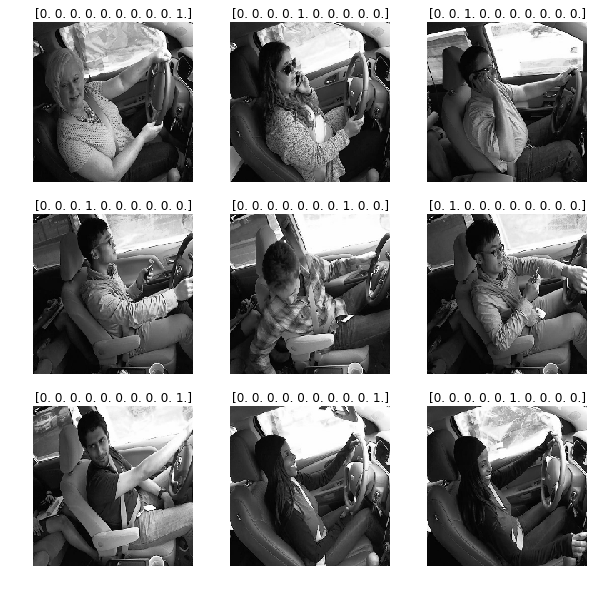

In [19]:
f, ax = plt.subplots(3,3, figsize=(10,10))
for i in range(9):
    im = array_to_img(imgs[i])
    r, c = i//3, i%3
    ax[r,c].axis('off')
    ax[r,c].set_title(labels[i])
    ax[i//3,i%3].imshow(im)

# Load Model

In [20]:
model = app.InceptionResNetV2(include_top=True, weights=None, input_shape=(224,224,1), classes=10)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 111, 111, 32) 288         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 111, 111, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 111, 111, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

conv2d_140 (Conv2D)             (None, 12, 12, 192)  215040      activation_139[0][0]             
__________________________________________________________________________________________________
batch_normalization_137 (BatchN (None, 12, 12, 192)  576         conv2d_137[0][0]                 
__________________________________________________________________________________________________
batch_normalization_140 (BatchN (None, 12, 12, 192)  576         conv2d_140[0][0]                 
__________________________________________________________________________________________________
activation_137 (Activation)     (None, 12, 12, 192)  0           batch_normalization_137[0][0]    
__________________________________________________________________________________________________
activation_140 (Activation)     (None, 12, 12, 192)  0           batch_normalization_140[0][0]    
__________________________________________________________________________________________________
block17_16

In [22]:
ckp = cb.ModelCheckpoint(model_dir + 'inception_resnetv2_2.h5', monitor='val_loss', verbose=1, save_best_only=True, mode='auto', period=1)

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit_generator(generator=train,
                            steps_per_epoch=train_imgs.shape[0]//batch_size, 
                            epochs=100,
                            validation_data=val,
                            validation_steps=val_imgs.shape[0]//batch_size,
                            callbacks=[ckp]
                           )

Epoch 1/100
420/420 [==============================] - 240s 572ms/step - loss: 0.4847 - acc: 0.8419 - val_loss: 1.5417 - val_acc: 0.6864

Epoch 00001: val_loss improved from inf to 1.54172, saving model to ../model/inception_resnetv2_2.h5
Epoch 2/100
420/420 [==============================] - 203s 483ms/step - loss: 0.1106 - acc: 0.9656 - val_loss: 0.5906 - val_acc: 0.8256

Epoch 00002: val_loss improved from 1.54172 to 0.59056, saving model to ../model/inception_resnetv2_2.h5
Epoch 3/100
420/420 [==============================] - 193s 460ms/step - loss: 0.0599 - acc: 0.9821 - val_loss: 1.5928 - val_acc: 0.6337

Epoch 00003: val_loss did not improve from 0.59056
Epoch 4/100
420/420 [==============================] - 193s 460ms/step - loss: 0.0543 - acc: 0.9831 - val_loss: 0.5042 - val_acc: 0.8585

Epoch 00004: val_loss improved from 0.59056 to 0.50417, saving model to ../model/inception_resnetv2_2.h5
Epoch 5/100
420/420 [==============================] - 193s 460ms/step - loss: 0.0405 

420/420 [==============================] - 193s 460ms/step - loss: 0.0095 - acc: 0.9972 - val_loss: 0.0480 - val_acc: 0.9908

Epoch 00042: val_loss did not improve from 0.02585
Epoch 43/100
420/420 [==============================] - 193s 460ms/step - loss: 0.0060 - acc: 0.9981 - val_loss: 0.0553 - val_acc: 0.9900

Epoch 00043: val_loss did not improve from 0.02585
Epoch 44/100
420/420 [==============================] - 194s 461ms/step - loss: 0.0123 - acc: 0.9967 - val_loss: 0.0359 - val_acc: 0.9931

Epoch 00044: val_loss did not improve from 0.02585
Epoch 45/100
420/420 [==============================] - 193s 460ms/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0286 - val_acc: 0.9952

Epoch 00045: val_loss did not improve from 0.02585
Epoch 46/100
420/420 [==============================] - 193s 460ms/step - loss: 7.5842e-04 - acc: 0.9997 - val_loss: 0.0556 - val_acc: 0.9918

Epoch 00046: val_loss did not improve from 0.02585
Epoch 47/100
420/420 [==============================] - 193

420/420 [==============================] - 193s 460ms/step - loss: 0.0018 - acc: 0.9996 - val_loss: 0.0398 - val_acc: 0.9925

Epoch 00083: val_loss did not improve from 0.01978
Epoch 84/100
420/420 [==============================] - 193s 460ms/step - loss: 0.0039 - acc: 0.9989 - val_loss: 0.0545 - val_acc: 0.9887

Epoch 00084: val_loss did not improve from 0.01978
Epoch 85/100
420/420 [==============================] - 194s 461ms/step - loss: 0.0012 - acc: 0.9993 - val_loss: 0.0310 - val_acc: 0.9950

Epoch 00085: val_loss did not improve from 0.01978
Epoch 86/100
420/420 [==============================] - 193s 460ms/step - loss: 0.0165 - acc: 0.9963 - val_loss: 0.0662 - val_acc: 0.9887

Epoch 00086: val_loss did not improve from 0.01978
Epoch 87/100
420/420 [==============================] - 193s 460ms/step - loss: 0.0045 - acc: 0.9990 - val_loss: 0.0534 - val_acc: 0.9885

Epoch 00087: val_loss did not improve from 0.01978
Epoch 88/100
420/420 [==============================] - 193s 46

In [26]:
def h_plot(h):
    '''
    h : model history
    path : image path to save
    '''
    # 5. 모델 학습 과정 표시하기
    fig, loss_ax = plt.subplots()

    acc_ax = loss_ax.twinx()

    keys =  list(h.keys())
    loss_ax.plot(h[keys[0]], 'y', Label=keys[0])
    loss_ax.plot(h[keys[1]], 'r', Label=keys[1])
    loss_ax.plot(h[keys[2]], 'b', Label=keys[2])
    loss_ax.plot(h[keys[3]], 'g', Label=keys[3])

    loss_ax.set_xlabel('Epoch')
    loss_ax.set_ylabel('Loss')
    acc_ax.set_ylabel('AUC')

    loss_ax.legend(loc='lower right')
    acc_ax.legend(loc='lower left')
    
    loss_ax.set_ylim(0,1)
    plt.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.


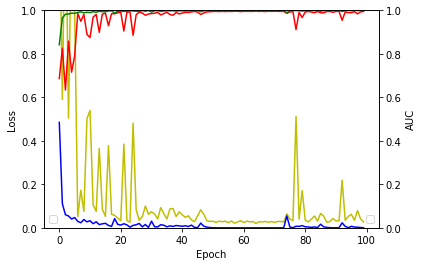

In [27]:
h_plot(h=history.history)

In [29]:
import json
from collections import OrderedDict

In [72]:
log = OrderedDict()
h = OrderedDict()
m_compile = OrderedDict()
log['ID'] = 2
log['NAME'] = 'inception_resnetv2_2'
log['INPUT_SHAPE'] = model.input_shape
m_compile['OPTIMIZER'] = str(type(model.optimizer))
m_compile['LOSS'] = model.loss
m_compile['METRICS'] = model.metrics_names
log['COMPILE'] = m_compile
h = history.params
h['LOSS'] = history.history['loss']
h['ACCURACY'] = history.history['acc']
h['VAL_LOSS'] = history.history['val_loss']
h['VAL_ACCURACY'] = history.history['val_acc']
log['HISTORY'] = h

In [73]:
log

OrderedDict([('ID', 2),
             ('NAME', 'inception_resnetv2_2'),
             ('INPUT_SHAPE', (None, 224, 224, 1)),
             ('COMPILE',
              OrderedDict([('OPTIMIZER', "<class 'keras.optimizers.Adam'>"),
                           ('LOSS', 'categorical_crossentropy'),
                           ('METRICS', ['loss', 'acc'])])),
             ('HISTORY',
              {'epochs': 100,
               'steps': 420,
               'verbose': 1,
               'do_validation': True,
               'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
               'LOSS': [0.48495019907961295,
                0.11056151013555271,
                0.05995651863730105,
                0.05428767426101458,
                0.040475454563935254,
                0.04717863124565791,
                0.029647790022257987,
                0.02315780568711453,
                0.03813427906677056,
                0.02722235076462401,
                0.03257758447578322,
                0

In [77]:
with open('../log/inception_resnetv2_2_info.json','w',encoding='utf-8') as make_file:
    json.dump(log, make_file, ensure_ascii=False, indent='\t')